In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('seeds.dataset.csv')
df.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [2]:
df.shape

(210, 8)

In [3]:
seedType_new = []
for i in df.seedType:
    if i == 1:
        seedType_new.append("Kama")
    elif i == 2:
        seedType_new.append("Rosa")
    else:
        seedType_new.append("Canadian")
df["seedType_new"] = seedType_new
df.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType,seedType_new
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


In [4]:
df.describe()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [5]:
seed = pd.DataFrame(df.groupby(["seedType_new"])["seedType_new"].count())
seed.columns = ["count_seedType"]
seed

,count_seedType
seedType_new,
Canadian,70
Kama,70
Rosa,70


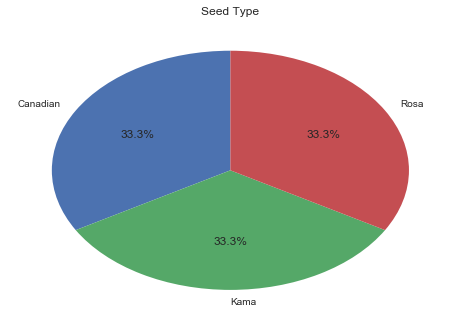

In [6]:
fig = plt.figure()
labels = ['Canadian', 'Kama', 'Rosa']
sizes = seed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Seed Type')
plt.show()

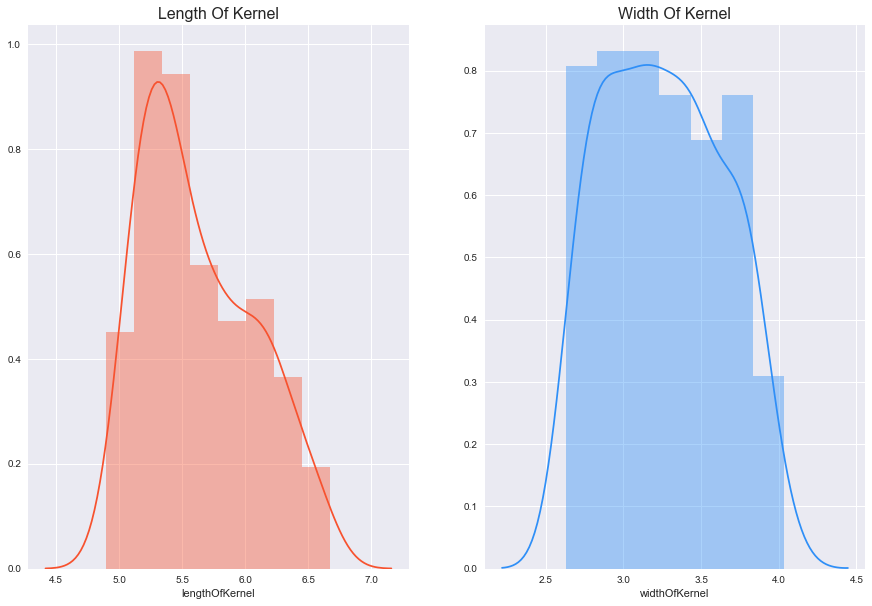

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
sns.distplot(df["lengthOfKernel"], ax=ax[0], color="#F7522F")
sns.distplot(df["widthOfKernel"], ax=ax[1], color="#2F8FF7")
ax[0].set_title("Length Of Kernel", fontsize=16)
ax[1].set_title("Width Of Kernel", fontsize=16)
plt.show()

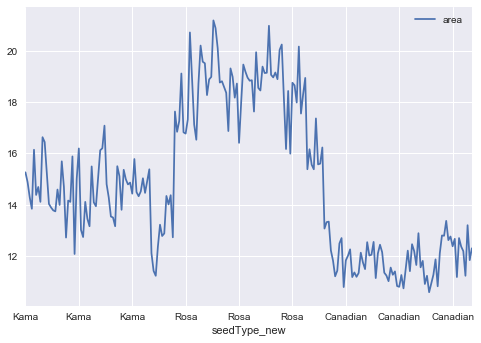

In [8]:
df.plot(kind="line", x="seedType_new", y="area")
plt.show()

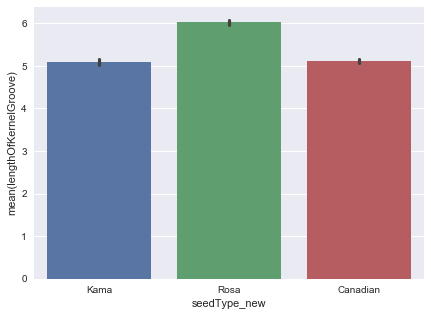

In [9]:
plt.figure(figsize=(7,5))
sns.barplot(df['seedType_new'], df['lengthOfKernelGroove'])
plt.show()

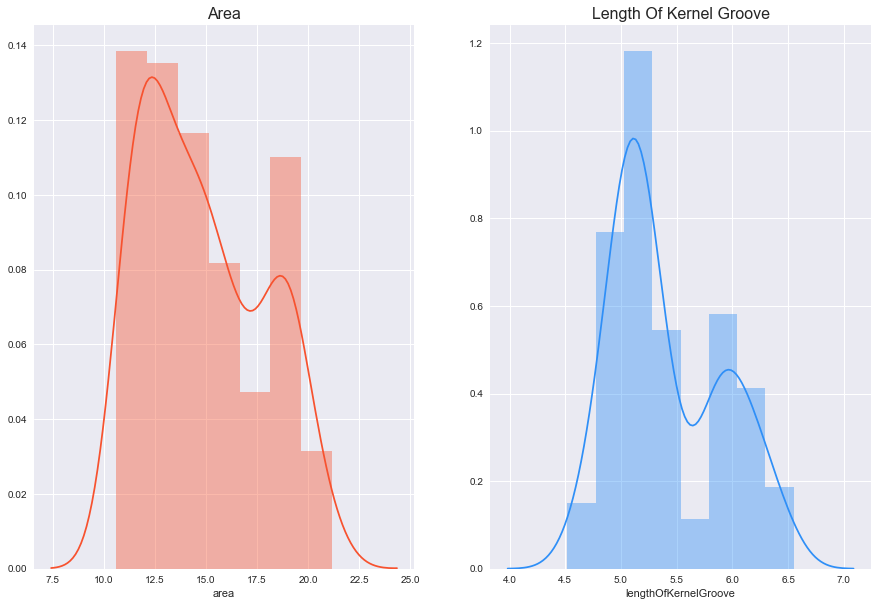

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
sns.distplot(df["area"], ax=ax[0], color="#F7522F")
sns.distplot(df["lengthOfKernelGroove"], ax=ax[1], color="#2F8FF7")
ax[0].set_title("Area", fontsize=16)
ax[1].set_title("Length Of Kernel Groove", fontsize=16)
plt.show()

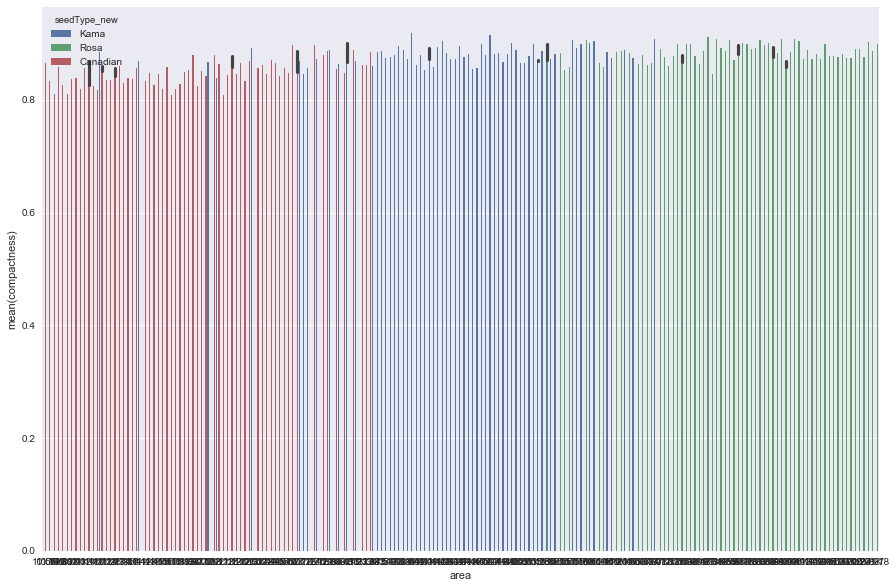

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(df['area'], df['compactness'], hue=df['seedType_new'])
plt.show()

In [13]:
area_kernel = df['lengthOfKernel'] * df['widthOfKernel']
df['area_kernel'] = area_kernel
df.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType,seedType_new,area_kernel
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama,19.087056
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama,18.511482
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama,17.656067
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama,17.989796
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama,20.153796


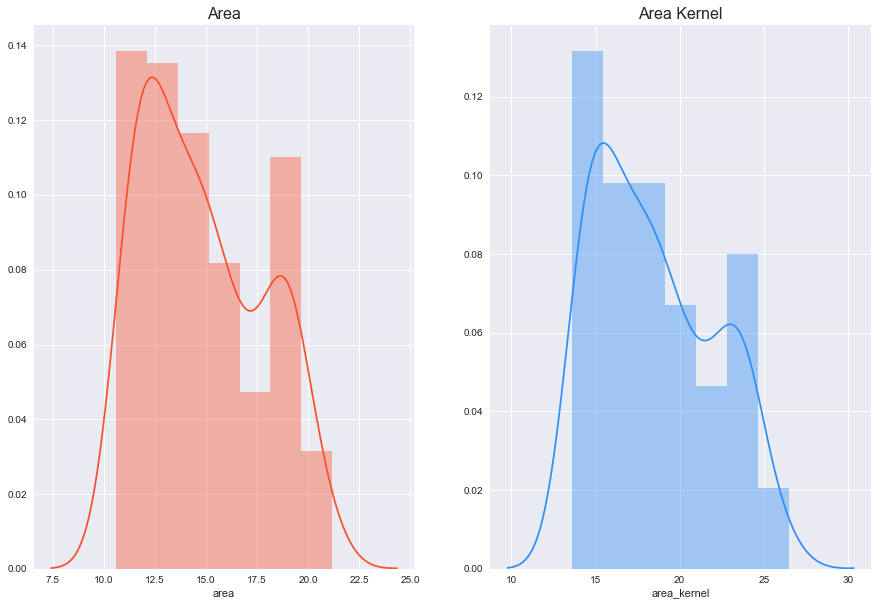

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
sns.distplot(df["area"], ax=ax[0], color="#F7522F")
sns.distplot(df["area_kernel"], ax=ax[1], color="#2F8FF7")
ax[0].set_title("Area", fontsize=16)
ax[1].set_title("Area Kernel", fontsize=16)
plt.show()

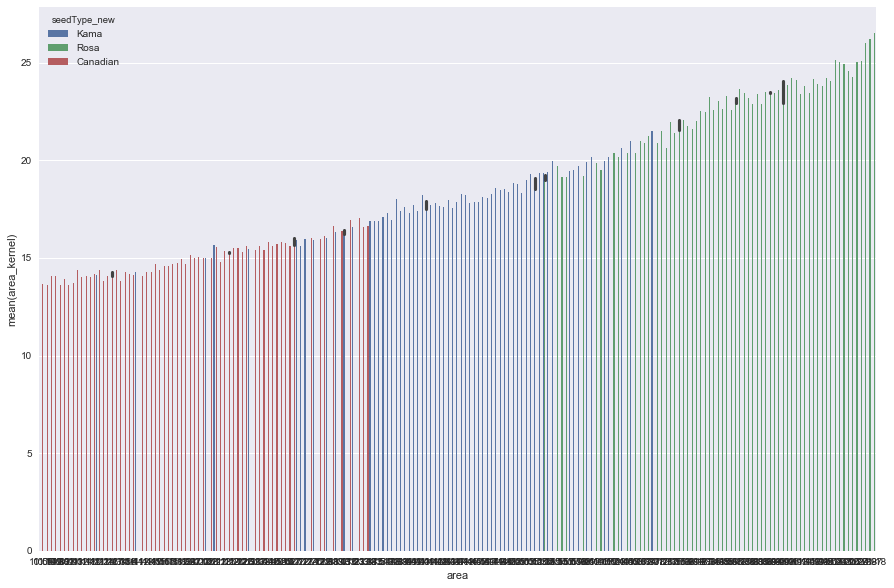

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(df['area'], df['area_kernel'], hue=df['seedType_new'])
plt.show()

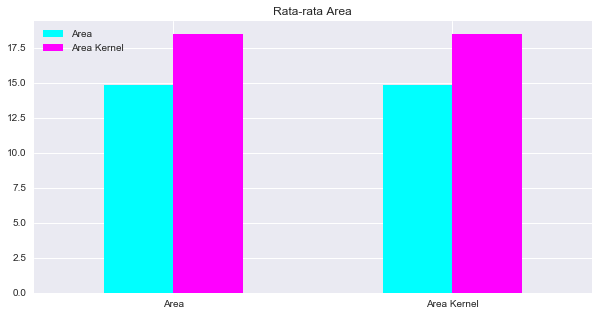

In [16]:
avg_area = round(df['area'].mean(axis=0), 2)
avg_area_kernel = round(df['area_kernel'].mean(axis=0), 2)
avg = [avg_area, avg_area_kernel]
index = ['Area', 'Area Kernel']
avg_vm = pd.DataFrame({'Area':avg_area, 'Area Kernel':avg_area_kernel}, index=index)
ax = avg_vm.plot.bar(rot=0, colormap='cool', figsize=[10,5])
ax.set_title('Rata-rata Area')
plt.show()